# Name      : Priyanshu Malik
# Roll no.  : 221BTCSEAM001

# Topic      : Used Car Price Prediction

## IMPORTING LIBRARIES

In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

## READING DATASET

In [16]:
car = pd.read_csv('Used_car_pricing_data.csv')
car_test = pd.read_csv('Used_car_pricing_data.csv')
car.head()

Unnamed: 0                              Name    Location  Year  \
0           0            Maruti Wagon R LXI CNG      Mumbai  2010   
1           1  Hyundai Creta 1.6 CRDi SX Option        Pune  2015   
2           2                      Honda Jazz V     Chennai  2011   
3           3                 Maruti Ertiga VDI     Chennai  2012   
4           4   Audi A4 New 2.0 TDI Multitronic  Coimbatore  2013   

   Kilometers_Driven Fuel_Type Transmission Owner_Type     Mileage   Engine  \
0              72000       CNG       Manual      First  26.6 km/kg   998 CC   
1              41000    Diesel       Manual      First  19.67 kmpl  1582 CC   
2              46000    Petrol       Manual      First   18.2 kmpl  1199 CC   
3              87000    Diesel       Manual      First  20.77 kmpl  1248 CC   
4              40670    Diesel    Automatic     Second   15.2 kmpl  1968 CC   

       Power  Seats  New_Price  Price  
0  58.16 bhp    5.0        NaN   1.75  
1  126.2 bhp    5.0        NaN  12.50  
2   88.7 bhp    5.0  8.61 Lakh   4.50  
3  88.76 bhp    7.0        NaN   6.00  
4  140.8 bhp    5.0        NaN  17.74

## 1} DATA PREPROCESSING AND DATA CLEANING

### 1.1} ANALYSING DATASET

#### VARIABLE DESCRIPTION

##### Name :-

Name refers to the car company name and its model name as it is also impact on the car pricing.

##### Location :-

Location refers to the area where car is available or the state initial on the number plate as each and every car has its own state name initials.

##### Year :-

Year refers in which year does the car bought from the dealership and year plays crucial role in car pricing.

##### Kilometers_Driven :-

Kilometer driven refers to the how much distance covered by car after bought from the dealership as more the car run on road , more wear and tear would happen on car which will affect the pricing of the car

##### Fuel_Type :-

Fuel type provide us the info about the car fuel consumption type and variety of fuel engines have different price range.

##### Transmission :-

Transmission tells us the type of gear box does the car have as every person have there own prefrence for transmission.There are two type of it which is Manual and Automatic.

##### Owner_Type :-

Owner type means after the car bought from the dealership how many times does the sold to other person .As First owner type means the car had been bought directly from dealership and Second means the car had been bought from the first owner of the car which car had been used by one person and then givien to another person nad this goes on and on.

##### Mileage :-

Mileage of the car means how much now does the car cover the distance per litre or kilogram according to the fuel type in the present date. As the mileage changes depend on the car condition.

##### Engine :-

Engine refers to the amount of air and fuel that can be pushed through the cylinders in the engine. As more the CC of the engine, more the pricing of the car.

##### Power :-

Power refers to BHP which stands for Brake Horsepower. It is a measure of an engine's power without any power losses under ideal conditions. More the BHP, More the price of the car.

##### Seats	:-

Seats refers amount the seats is available in the car as seats does affect the pricing directly but buyers demand or prefrence on seats affect the price.

##### New_Price :-

New price provide the pricing of the car.

##### Price :-

Pricing Provide the amount of the car pricing in the present after all the factor changed.

In [30]:
car.describe()

Year  Kilometers_Driven        Seats        Price
count  6019.000000       6.019000e+03  5977.000000  6019.000000
mean   2013.358199       5.873838e+04     5.278735     9.479468
std       3.269742       9.126884e+04     0.808840    11.187917
min    1998.000000       1.710000e+02     0.000000     0.440000
25%    2011.000000       3.400000e+04     5.000000     3.500000
50%    2014.000000       5.300000e+04     5.000000     5.640000
75%    2016.000000       7.300000e+04     5.000000     9.950000
max    2019.000000       6.500000e+06    10.000000   160.000000

In [32]:
car.head(10)

Name    Location  Year  Kilometers_Driven  \
0               Maruti Wagon R LXI CNG      Mumbai  2010              72000   
1     Hyundai Creta 1.6 CRDi SX Option        Pune  2015              41000   
2                         Honda Jazz V     Chennai  2011              46000   
3                    Maruti Ertiga VDI     Chennai  2012              87000   
4      Audi A4 New 2.0 TDI Multitronic  Coimbatore  2013              40670   
5      Hyundai EON LPG Era Plus Option   Hyderabad  2012              75000   
6               Nissan Micra Diesel XV      Jaipur  2013              86999   
7    Toyota Innova Crysta 2.8 GX AT 8S      Mumbai  2016              36000   
8  Volkswagen Vento Diesel Comfortline        Pune  2013              64430   
9       Tata Indica Vista Quadrajet LS     Chennai  2012              65932   

  Fuel_Type Transmission Owner_Type     Mileage   Engine      Power  Seats  \
0       CNG       Manual      First  26.6 km/kg   998 CC  58.16 bhp    5.0   
1    Diesel       Manual      First  19.67 kmpl  1582 CC  126.2 bhp    5.0   
2    Petrol       Manual      First   18.2 kmpl  1199 CC   88.7 bhp    5.0   
3    Diesel       Manual      First  20.77 kmpl  1248 CC  88.76 bhp    7.0   
4    Diesel    Automatic     Second   15.2 kmpl  1968 CC  140.8 bhp    5.0   
5       LPG       Manual      First  21.1 km/kg   814 CC   55.2 bhp    5.0   
6    Diesel       Manual      First  23.08 kmpl  1461 CC   63.1 bhp    5.0   
7    Diesel    Automatic      First  11.36 kmpl  2755 CC  171.5 bhp    8.0   
8    Diesel       Manual      First  20.54 kmpl  1598 CC  103.6 bhp    5.0   
9    Diesel       Manual     Second   22.3 kmpl  1248 CC     74 bhp    5.0   

   New_Price  Price  
0        NaN   1.75  
1        NaN  12.50  
2  8.61 Lakh   4.50  
3        NaN   6.00  
4        NaN  17.74  
5        NaN   2.35  
6        NaN   3.50  
7    21 Lakh  17.50  
8        NaN   5.20  
9        NaN   1.95

In [34]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6019 non-null   object 
 1   Location           6019 non-null   object 
 2   Year               6019 non-null   int64  
 3   Kilometers_Driven  6019 non-null   int64  
 4   Fuel_Type          6019 non-null   object 
 5   Transmission       6019 non-null   object 
 6   Owner_Type         6019 non-null   object 
 7   Mileage            6017 non-null   object 
 8   Engine             5983 non-null   object 
 9   Power              5983 non-null   object 
 10  Seats              5977 non-null   float64
 11  New_Price          824 non-null    object 
 12  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(9)
memory usage: 611.4+ KB


#### OUTPUT :- There are 3 Integer variables ,2 float variables and 9 character variables

In [36]:
car.shape

(6019, 13)

### 1.2} CHECHKING DUPLICATE ROWS

In [ ]:
car.duplicated().sum()

0

##### OUTPUT :- There are 0 Duplicate rows in the dataset.

#### Removing unnecessary column ' unnamed ' from the data set

In [ ]:
car.drop('Unnamed: 0',axis =1,inplace = True )

In [ ]:
car.head()

Name    Location  Year  Kilometers_Driven  \
0            Maruti Wagon R LXI CNG      Mumbai  2010              72000   
1  Hyundai Creta 1.6 CRDi SX Option        Pune  2015              41000   
2                      Honda Jazz V     Chennai  2011              46000   
3                 Maruti Ertiga VDI     Chennai  2012              87000   
4   Audi A4 New 2.0 TDI Multitronic  Coimbatore  2013              40670   

  Fuel_Type Transmission Owner_Type     Mileage   Engine      Power  Seats  \
0       CNG       Manual      First  26.6 km/kg   998 CC  58.16 bhp    5.0   
1    Diesel       Manual      First  19.67 kmpl  1582 CC  126.2 bhp    5.0   
2    Petrol       Manual      First   18.2 kmpl  1199 CC   88.7 bhp    5.0   
3    Diesel       Manual      First  20.77 kmpl  1248 CC  88.76 bhp    7.0   
4    Diesel    Automatic     Second   15.2 kmpl  1968 CC  140.8 bhp    5.0   

   New_Price  Price  
0        NaN   1.75  
1        NaN  12.50  
2  8.61 Lakh   4.50  
3        NaN   6.00  
4        NaN  17.74

### CHECKING NULL VALUES

In [ ]:
car.isnull().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                  36
Seats                  42
New_Price            5195
Price                   0
dtype: int64

##### Output :- There are Mileage-2,Engine-36,Power-36,Seats-42 and New_Price-5195 Null Values in the dataset.

In [ ]:
round(car.isnull().mean() * 100,1)

Name                  0.0
Location              0.0
Year                  0.0
Kilometers_Driven     0.0
Fuel_Type             0.0
Transmission          0.0
Owner_Type            0.0
Mileage               0.0
Engine                0.6
Power                 0.6
Seats                 0.7
New_Price            86.3
Price                 0.0
dtype: float64

#### Droping the " NEW_PRICE " column from the dataset beacause it has more than 80% of Null values.

In [ ]:
car.drop('New_Price' , axis =1 , inplace = True )

### 1.3} DROPING THE NULL VALUES

In [ ]:
car.dropna(subset='Mileage', inplace=True)

In [ ]:
car.isnull().sum()

Name                  0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               0
Engine               36
Power                36
Seats                42
Price                 0
dtype: int64

In [ ]:
car.dropna(subset='Engine', inplace=True)

In [ ]:
car.isnull().sum()

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                6
Price                0
dtype: int64

In [ ]:
car.dropna(subset='Seats', inplace=True)

In [ ]:
car.isnull().sum()

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
dtype: int64

##### OUTPUT :- ALL THE NULL VALUES HAS BEEN REMOVED

In [ ]:
car.Seats.value_counts().sort_values(ascending=True)

Seats
0.0        1
9.0        3
10.0       5
2.0       16
6.0       31
4.0       99
8.0      134
7.0      674
5.0     5012
Name: count, dtype: int64

##### OUTPUT :- TOTAL NUMBER OF CAR HAVE DIFFERENT QUANTITY OF SEATS

### 1.4} TYPECASTING THE CHARACTER COLUMNS INTO NUMERICAL COLUMNS

In [ ]:
car = car.rename({"Engine":"Engine (CC)"},axis=1)

In [ ]:
car

Name    Location  Year  Kilometers_Driven  \
0               Maruti Wagon R LXI CNG      Mumbai  2010              72000   
1     Hyundai Creta 1.6 CRDi SX Option        Pune  2015              41000   
2                         Honda Jazz V     Chennai  2011              46000   
3                    Maruti Ertiga VDI     Chennai  2012              87000   
4      Audi A4 New 2.0 TDI Multitronic  Coimbatore  2013              40670   
...                                ...         ...   ...                ...   
6014                  Maruti Swift VDI       Delhi  2014              27365   
6015          Hyundai Xcent 1.1 CRDi S      Jaipur  2015             100000   
6016             Mahindra Xylo D4 BSIV      Jaipur  2012              55000   
6017                Maruti Wagon R VXI     Kolkata  2013              46000   
6018             Chevrolet Beat Diesel   Hyderabad  2011              47000   

     Fuel_Type Transmission Owner_Type     Mileage Engine (CC)      Power  \
0          CNG       Manual      First  26.6 km/kg      998 CC  58.16 bhp   
1       Diesel       Manual      First  19.67 kmpl     1582 CC  126.2 bhp   
2       Petrol       Manual      First   18.2 kmpl     1199 CC   88.7 bhp   
3       Diesel       Manual      First  20.77 kmpl     1248 CC  88.76 bhp   
4       Diesel    Automatic     Second   15.2 kmpl     1968 CC  140.8 bhp   
...        ...          ...        ...         ...         ...        ...   
6014    Diesel       Manual      First   28.4 kmpl     1248 CC     74 bhp   
6015    Diesel       Manual      First   24.4 kmpl     1120 CC     71 bhp   
6016    Diesel       Manual     Second   14.0 kmpl     2498 CC    112 bhp   
6017    Petrol       Manual      First   18.9 kmpl      998 CC   67.1 bhp   
6018    Diesel       Manual      First  25.44 kmpl      936 CC   57.6 bhp   

      Seats  Price  
0       5.0   1.75  
1       5.0  12.50  
2       5.0   4.50  
3       7.0   6.00  
4       5.0  17.74  
...     ...    ...  
6014    5.0   4.75  
6015    5.0   4.00  
6016    8.0   2.90  
6017    5.0   2.65  
6018    5.0   2.50  

[5975 rows x 12 columns]

In [ ]:
car = car.rename({"Power":"Power (bhp)"},axis=1)

In [ ]:
car

Name    Location  Year  Kilometers_Driven  \
0               Maruti Wagon R LXI CNG      Mumbai  2010              72000   
1     Hyundai Creta 1.6 CRDi SX Option        Pune  2015              41000   
2                         Honda Jazz V     Chennai  2011              46000   
3                    Maruti Ertiga VDI     Chennai  2012              87000   
4      Audi A4 New 2.0 TDI Multitronic  Coimbatore  2013              40670   
...                                ...         ...   ...                ...   
6014                  Maruti Swift VDI       Delhi  2014              27365   
6015          Hyundai Xcent 1.1 CRDi S      Jaipur  2015             100000   
6016             Mahindra Xylo D4 BSIV      Jaipur  2012              55000   
6017                Maruti Wagon R VXI     Kolkata  2013              46000   
6018             Chevrolet Beat Diesel   Hyderabad  2011              47000   

     Fuel_Type Transmission Owner_Type     Mileage Engine (CC) Power (bhp)  \
0          CNG       Manual      First  26.6 km/kg      998 CC   58.16 bhp   
1       Diesel       Manual      First  19.67 kmpl     1582 CC   126.2 bhp   
2       Petrol       Manual      First   18.2 kmpl     1199 CC    88.7 bhp   
3       Diesel       Manual      First  20.77 kmpl     1248 CC   88.76 bhp   
4       Diesel    Automatic     Second   15.2 kmpl     1968 CC   140.8 bhp   
...        ...          ...        ...         ...         ...         ...   
6014    Diesel       Manual      First   28.4 kmpl     1248 CC      74 bhp   
6015    Diesel       Manual      First   24.4 kmpl     1120 CC      71 bhp   
6016    Diesel       Manual     Second   14.0 kmpl     2498 CC     112 bhp   
6017    Petrol       Manual      First   18.9 kmpl      998 CC    67.1 bhp   
6018    Diesel       Manual      First  25.44 kmpl      936 CC    57.6 bhp   

      Seats  Price  
0       5.0   1.75  
1       5.0  12.50  
2       5.0   4.50  
3       7.0   6.00  
4       5.0  17.74  
...     ...    ...  
6014    5.0   4.75  
6015    5.0   4.00  
6016    8.0   2.90  
6017    5.0   2.65  
6018    5.0   2.50  

[5975 rows x 12 columns]

In [ ]:
car['Engine (CC)'] = car['Engine (CC)'].str.rstrip(' CC')
car['Power (bhp)'] = car['Power (bhp)'].str.rstrip(' bhp')

In [ ]:
car.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5975 entries, 0 to 6018
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               5975 non-null   object 
 1   Location           5975 non-null   object 
 2   Year               5975 non-null   int64  
 3   Kilometers_Driven  5975 non-null   int64  
 4   Fuel_Type          5975 non-null   object 
 5   Transmission       5975 non-null   object 
 6   Owner_Type         5975 non-null   object 
 7   Mileage            5975 non-null   object 
 8   Engine (CC)        5975 non-null   object 
 9   Power (bhp)        5975 non-null   object 
 10  Seats              5975 non-null   float64
 11  Price              5975 non-null   float64
dtypes: float64(2), int64(2), object(8)
memory usage: 606.8+ KB


In [ ]:
car['Power (bhp)']=pd.to_numeric(car['Power (bhp)'],errors="coerce")

In [ ]:
car['Power (bhp)']=car['Power (bhp)'].fillna(car['Power (bhp)'].mean())

In [ ]:
car['Power (bhp)']=car['Power (bhp)'].astype(int)

In [ ]:
car.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5975 entries, 0 to 6018
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               5975 non-null   object 
 1   Location           5975 non-null   object 
 2   Year               5975 non-null   int64  
 3   Kilometers_Driven  5975 non-null   int64  
 4   Fuel_Type          5975 non-null   object 
 5   Transmission       5975 non-null   object 
 6   Owner_Type         5975 non-null   object 
 7   Mileage            5975 non-null   object 
 8   Engine (CC)        5975 non-null   object 
 9   Power (bhp)        5975 non-null   int32  
 10  Seats              5975 non-null   float64
 11  Price              5975 non-null   float64
dtypes: float64(2), int32(1), int64(2), object(7)
memory usage: 583.5+ KB


In [ ]:
car['Engine (CC)']=pd.to_numeric(car['Engine (CC)'],errors="coerce")

In [ ]:
car['Engine (CC)']=car['Engine (CC)'].fillna(car['Engine (CC)'].mean())

In [ ]:
car['Engine (CC)']=car['Engine (CC)'].astype(int)

In [ ]:
car.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5975 entries, 0 to 6018
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               5975 non-null   object 
 1   Location           5975 non-null   object 
 2   Year               5975 non-null   int64  
 3   Kilometers_Driven  5975 non-null   int64  
 4   Fuel_Type          5975 non-null   object 
 5   Transmission       5975 non-null   object 
 6   Owner_Type         5975 non-null   object 
 7   Mileage            5975 non-null   object 
 8   Engine (CC)        5975 non-null   int32  
 9   Power (bhp)        5975 non-null   int32  
 10  Seats              5975 non-null   float64
 11  Price              5975 non-null   float64
dtypes: float64(2), int32(2), int64(2), object(6)
memory usage: 560.2+ KB


In [ ]:
car['Seats']=car['Seats'].fillna(car['Seats'].mean())

In [ ]:
car['Seats']=car['Seats'].astype(int)

In [ ]:
car.isnull().sum()

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine (CC)          0
Power (bhp)          0
Seats                0
Price                0
dtype: int64

In [ ]:
car.head()

Name    Location  Year  Kilometers_Driven  \
0            Maruti Wagon R LXI CNG      Mumbai  2010              72000   
1  Hyundai Creta 1.6 CRDi SX Option        Pune  2015              41000   
2                      Honda Jazz V     Chennai  2011              46000   
3                 Maruti Ertiga VDI     Chennai  2012              87000   
4   Audi A4 New 2.0 TDI Multitronic  Coimbatore  2013              40670   

  Fuel_Type Transmission Owner_Type     Mileage  Engine (CC)  Power (bhp)  \
0       CNG       Manual      First  26.6 km/kg          998           58   
1    Diesel       Manual      First  19.67 kmpl         1582          126   
2    Petrol       Manual      First   18.2 kmpl         1199           88   
3    Diesel       Manual      First  20.77 kmpl         1248           88   
4    Diesel    Automatic     Second   15.2 kmpl         1968          140   

   Seats  Price  
0      5   1.75  
1      5  12.50  
2      5   4.50  
3      7   6.00  
4      5  17.74

#### CONVERT THE MILEAGE ON THE BASIS OF FUEL TYPE BY CONVERTING CNG/LPG(KM PER KG) INTO PETROL/DIESEL(KM PER LITRE)

In [ ]:
car["Fuel_Type"].unique()

array(['CNG', 'Diesel', 'Petrol', 'LPG'], dtype=object)

In [ ]:
def convert_milage_to_int(Mileage):
    new_mileage =  float(Mileage.split(' ')[0])
    if Mileage.split(' ')[1] == 'km/kg':
        new_mileage = new_mileage * 0.74

    return new_mileage

car['Mileage'] = car['Mileage'].apply(convert_milage_to_int)

In [ ]:
car.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5975 entries, 0 to 6018
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               5975 non-null   object 
 1   Location           5975 non-null   object 
 2   Year               5975 non-null   int64  
 3   Kilometers_Driven  5975 non-null   int64  
 4   Fuel_Type          5975 non-null   object 
 5   Transmission       5975 non-null   object 
 6   Owner_Type         5975 non-null   object 
 7   Mileage            5975 non-null   float64
 8   Engine (CC)        5975 non-null   int32  
 9   Power (bhp)        5975 non-null   int32  
 10  Seats              5975 non-null   int32  
 11  Price              5975 non-null   float64
dtypes: float64(2), int32(3), int64(2), object(5)
memory usage: 536.8+ KB


##### OUTPUT :- CHARACTER COLUMNS HAVE BEEN CONVERTED INTO NUMERICAL COLUMNS

In [ ]:
car = car.rename({"Mileage":"Mileage(KMPL)"},axis=1)

In [ ]:
car

Name    Location  Year  Kilometers_Driven  \
0               Maruti Wagon R LXI CNG      Mumbai  2010              72000   
1     Hyundai Creta 1.6 CRDi SX Option        Pune  2015              41000   
2                         Honda Jazz V     Chennai  2011              46000   
3                    Maruti Ertiga VDI     Chennai  2012              87000   
4      Audi A4 New 2.0 TDI Multitronic  Coimbatore  2013              40670   
...                                ...         ...   ...                ...   
6014                  Maruti Swift VDI       Delhi  2014              27365   
6015          Hyundai Xcent 1.1 CRDi S      Jaipur  2015             100000   
6016             Mahindra Xylo D4 BSIV      Jaipur  2012              55000   
6017                Maruti Wagon R VXI     Kolkata  2013              46000   
6018             Chevrolet Beat Diesel   Hyderabad  2011              47000   

     Fuel_Type Transmission Owner_Type  Mileage(KMPL)  Engine (CC)  \
0          CNG       Manual      First         19.684          998   
1       Diesel       Manual      First         19.670         1582   
2       Petrol       Manual      First         18.200         1199   
3       Diesel       Manual      First         20.770         1248   
4       Diesel    Automatic     Second         15.200         1968   
...        ...          ...        ...            ...          ...   
6014    Diesel       Manual      First         28.400         1248   
6015    Diesel       Manual      First         24.400         1120   
6016    Diesel       Manual     Second         14.000         2498   
6017    Petrol       Manual      First         18.900          998   
6018    Diesel       Manual      First         25.440          936   

      Power (bhp)  Seats  Price  
0              58      5   1.75  
1             126      5  12.50  
2              88      5   4.50  
3              88      7   6.00  
4             140      5  17.74  
...           ...    ...    ...  
6014           74      5   4.75  
6015           71      5   4.00  
6016          112      8   2.90  
6017           67      5   2.65  
6018           57      5   2.50  

[5975 rows x 12 columns]

#### SEPERATING OUT THE BRAND NAME OF THE CAR FROM THE MODEL NAME OF THE CAR FROM THE DATASET

In [ ]:
car['Name'].nunique()

1855

In [ ]:
new = car["Name"].str.split(" ", n = 1, expand = True)

car["Brand"]= new[0]

car["Name"]= new[1]

In [ ]:
car['Brand']=car['Brand'].replace({"Isuzu":"ISUZU"})

#### DATA FRAME AFTER TYPCASTING

In [ ]:
car.head()

Name    Location  Year  Kilometers_Driven Fuel_Type  \
0             Wagon R LXI CNG      Mumbai  2010              72000       CNG   
1    Creta 1.6 CRDi SX Option        Pune  2015              41000    Diesel   
2                      Jazz V     Chennai  2011              46000    Petrol   
3                  Ertiga VDI     Chennai  2012              87000    Diesel   
4  A4 New 2.0 TDI Multitronic  Coimbatore  2013              40670    Diesel   

  Transmission Owner_Type  Mileage(KMPL)  Engine (CC)  Power (bhp)  Seats  \
0       Manual      First         19.684          998           58      5   
1       Manual      First         19.670         1582          126      5   
2       Manual      First         18.200         1199           88      5   
3       Manual      First         20.770         1248           88      7   
4    Automatic     Second         15.200         1968          140      5   

   Price    Brand  
0   1.75   Maruti  
1  12.50  Hyundai  
2   4.50    Honda  
3   6.00   Maruti  
4  17.74     Audi

## 2} DATA ANALYSING

In [ ]:
cat = car.select_dtypes(include='object').columns.tolist()
cat

['Name', 'Location', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Brand']

In [ ]:
for col in cat:
    print(car[col].value_counts())
    print('==============================================================')

Name
XUV500 W8 2WD               49
Swift VDI                   45
City 1.5 S MT               34
Swift Dzire VDI             34
Swift VDI BSIV              31
                            ..
Fiesta Titanium 1.5 TDCi     1
Scorpio S10 AT 4WD           1
i20 1.2 Era                  1
Camry W4 (AT)                1
Xylo D4 BSIV                 1
Name: count, Length: 1855, dtype: int64
Location
Mumbai        784
Hyderabad     741
Kochi         648
Coimbatore    634
Pune          613
Delhi         549
Kolkata       530
Chennai       490
Jaipur        410
Bangalore     353
Ahmedabad     223
Name: count, dtype: int64
Fuel_Type
Diesel    3195
Petrol    2714
CNG         56
LPG         10
Name: count, dtype: int64
Transmission
Manual       4266
Automatic    1709
Name: count, dtype: int64
Owner_Type
First             4903
Second             953
Third              111
Fourth & Above       8
Name: count, dtype: int64
Brand
Maruti           1197
Hyundai          1100
Honda             601
Toyota   

In [ ]:
num = car.select_dtypes(exclude = 'O').columns.tolist()
num

['Year',
 'Kilometers_Driven',
 'Mileage(KMPL)',
 'Engine (CC)',
 'Power (bhp)',
 'Seats',
 'Price']

In [ ]:
for col in num:
    print(car[col].value_counts())
    print('==============================================================')

Year
2014    795
2015    741
2016    740
2013    648
2017    586
2012    572
2011    461
2010    339
2018    298
2009    196
2008    169
2007    123
2019    102
2006     75
2005     55
2004     29
2003     15
2002     14
2001      7
2000      4
1998      4
1999      2
Name: count, dtype: int64
Kilometers_Driven
60000    82
45000    70
65000    67
50000    60
70000    60
         ..
68465     1
63854     1
64241     1
2200      1
27365     1
Name: count, Length: 3080, dtype: int64
Mileage(KMPL)
18.900    172
17.000    170
18.600    119
20.360     88
21.100     86
         ... 
14.570      1
14.330      1
16.872      1
8.000       1
17.240      1
Name: count, Length: 439, dtype: int64
Engine (CC)
1197    606
1248    512
1498    303
998     259
2179    240
       ... 
1489      1
1422      1
1978      1
2694      1
1797      1
Name: count, Length: 145, dtype: int64
Power (bhp)
88     358
67     272
74     242
73     212
81     183
      ... 
340      1
231      1
333      1
402      1
488

In [ ]:
car

Name    Location  Year  Kilometers_Driven  \
0                Wagon R LXI CNG      Mumbai  2010              72000   
1       Creta 1.6 CRDi SX Option        Pune  2015              41000   
2                         Jazz V     Chennai  2011              46000   
3                     Ertiga VDI     Chennai  2012              87000   
4     A4 New 2.0 TDI Multitronic  Coimbatore  2013              40670   
...                          ...         ...   ...                ...   
6014                   Swift VDI       Delhi  2014              27365   
6015            Xcent 1.1 CRDi S      Jaipur  2015             100000   
6016                Xylo D4 BSIV      Jaipur  2012              55000   
6017                 Wagon R VXI     Kolkata  2013              46000   
6018                 Beat Diesel   Hyderabad  2011              47000   

     Fuel_Type Transmission Owner_Type  Mileage(KMPL)  Engine (CC)  \
0          CNG       Manual      First         19.684          998   
1       Diesel       Manual      First         19.670         1582   
2       Petrol       Manual      First         18.200         1199   
3       Diesel       Manual      First         20.770         1248   
4       Diesel    Automatic     Second         15.200         1968   
...        ...          ...        ...            ...          ...   
6014    Diesel       Manual      First         28.400         1248   
6015    Diesel       Manual      First         24.400         1120   
6016    Diesel       Manual     Second         14.000         2498   
6017    Petrol       Manual      First         18.900          998   
6018    Diesel       Manual      First         25.440          936   

      Power (bhp)  Seats  Price      Brand  
0              58      5   1.75     Maruti  
1             126      5  12.50    Hyundai  
2              88      5   4.50      Honda  
3              88      7   6.00     Maruti  
4             140      5  17.74       Audi  
...           ...    ...    ...        ...  
6014           74      5   4.75     Maruti  
6015           71      5   4.00    Hyundai  
6016          112      8   2.90   Mahindra  
6017           67      5   2.65     Maruti  
6018           57      5   2.50  Chevrolet  

[5975 rows x 13 columns]

## 3} DATA VISUALISATION

In [ ]:
car.columns

Index(['Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage(KMPL)', 'Engine (CC)',
       'Power (bhp)', 'Seats', 'Price', 'Brand'],
      dtype='object')

### 3.1} DATA VISUALISATION FOR NUMERICAL VARIABLE

#### 3.1.1) HISTPLOT FOR YEAR

<Axes: xlabel='Year', ylabel='Count'>

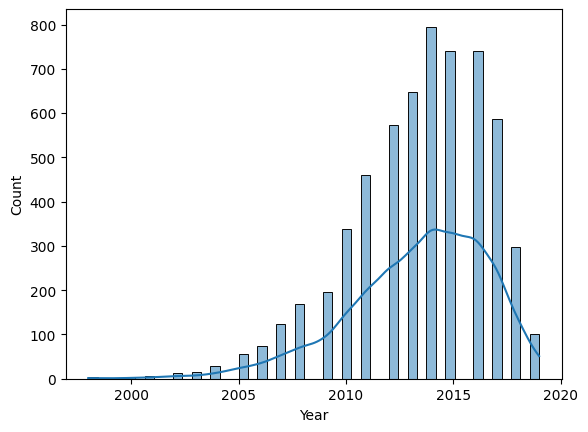

In [ ]:
 sns.histplot(data = car , x = "Year",kde = True)

#### 3.1.2) HISTPLOT FOR KILOMETER DRIVEN BY THE CAR

<Axes: xlabel='Kilometers_Driven', ylabel='Count'>

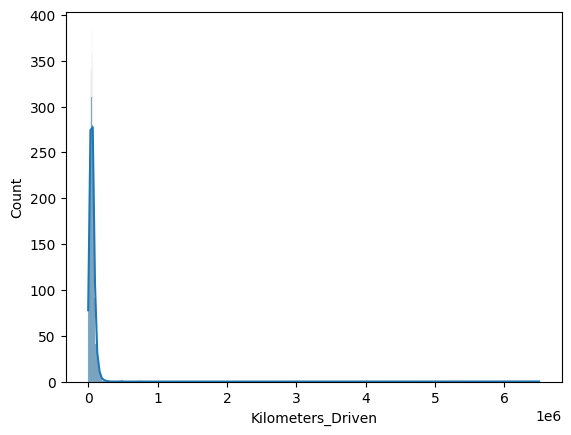

In [ ]:
sns.histplot(data = car , x = "Kilometers_Driven",kde = True)

#### 3.1.3) HISTPLOT FOR MILEAGE OF THE CAR

<Axes: xlabel='Mileage(KMPL)', ylabel='Count'>

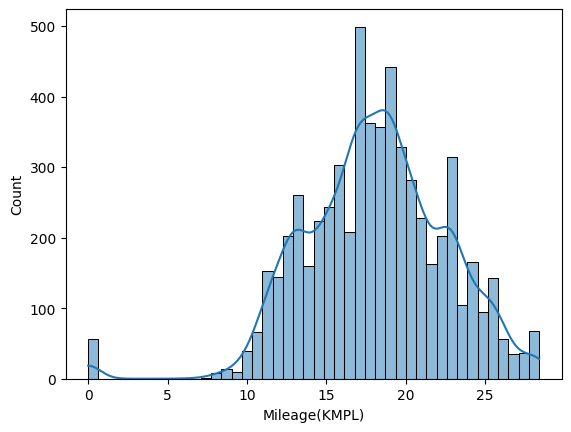

In [ ]:
sns.histplot(data = car , x = "Mileage(KMPL)",kde = True)

#### 3.1.4) HISTPLOT FOR ENGINE CC OF THE CAR

<Axes: xlabel='Engine (CC)', ylabel='Count'>

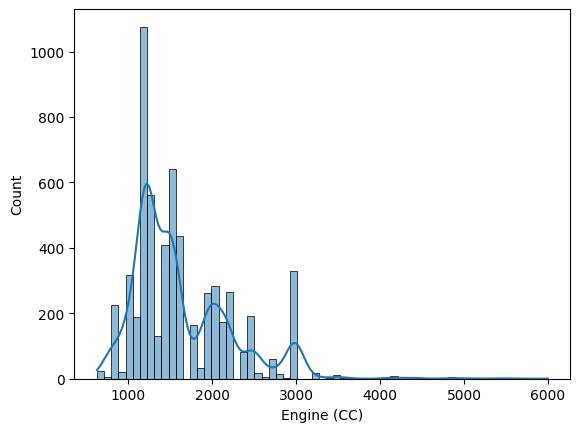

In [ ]:
sns.histplot(data = car , x = "Engine (CC)",kde = True)

#### 3.1.4) HISTPLOT FOR POWER BHP OF THE CAR

<Axes: xlabel='Power (bhp)', ylabel='Count'>

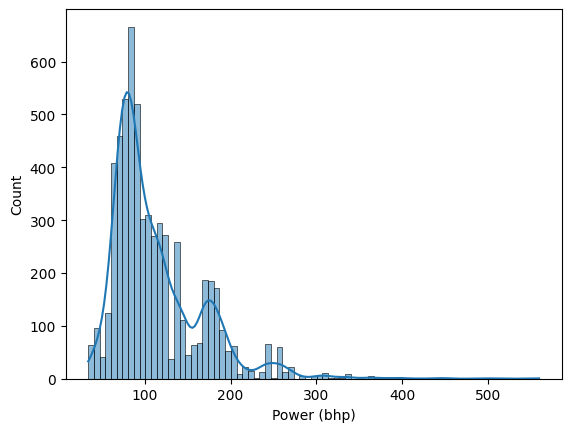

In [ ]:
sns.histplot(data = car , x = "Power (bhp)",kde = True)

#### 3.1.5) HISTPLOT FOR NUMBER OF SEATS OF THE CAR

<Axes: xlabel='Seats', ylabel='Count'>

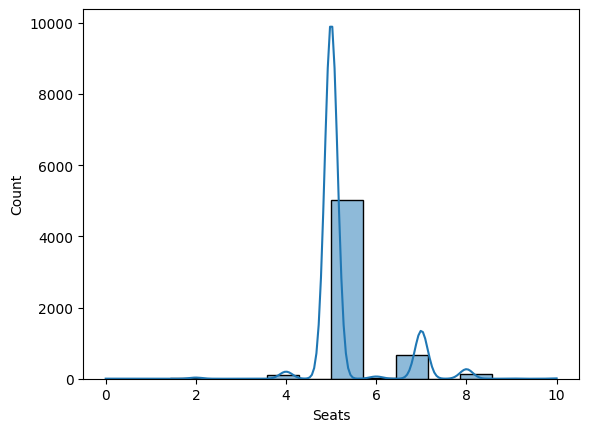

In [ ]:
sns.histplot(data = car , x = "Seats",kde = True)

#### 3.1.6) HISTPLOT FOR PRICING OF THE CAR

<Axes: xlabel='Price', ylabel='Count'>

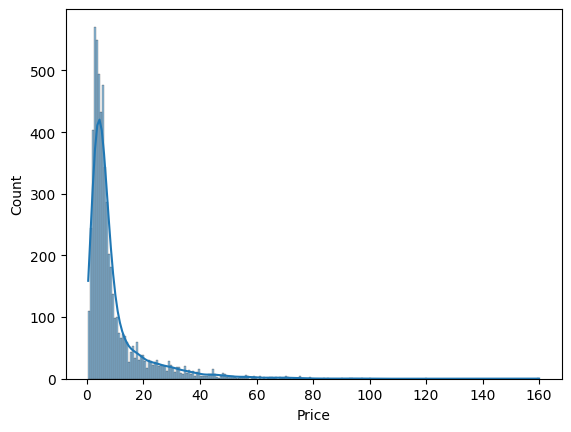

In [ ]:
sns.histplot(data = car , x = "Price",kde = True)

### 3.2} DATA VISUALISATION FOR CHARACTER VARIABLE

#### 3.2.1) PIECHART FOR LOCATION OF THE CAR

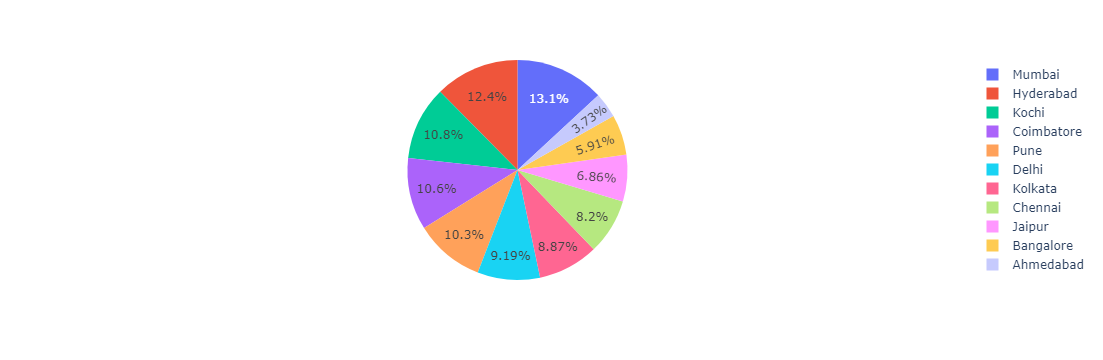

In [ ]:
fig = px.pie(data_frame = car,names =car['Location'])
fig.show()

#### 3.2.2) PIECHART FOR IN WHICH YEAR CAR WAS BOUGHT

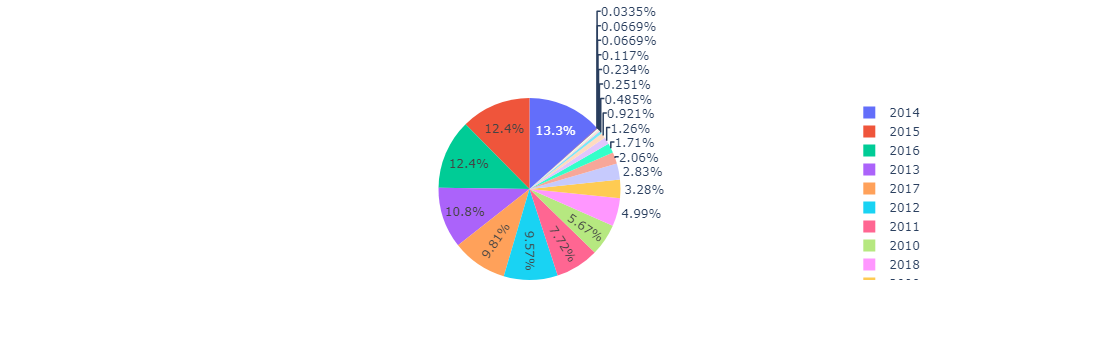

In [ ]:
fig = px.pie(data_frame = car,names =car['Year'])
fig.show()

#### 3.2.3) PIECHART FOR FUEL CONSUMPTION TYPE OF THE CAR

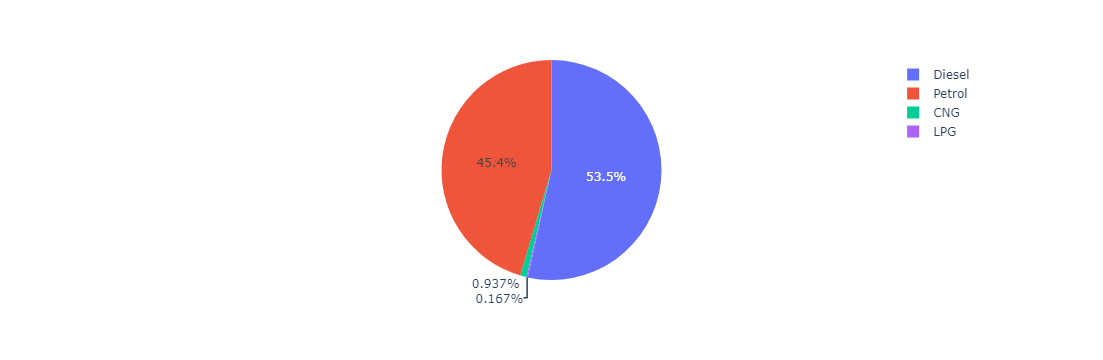

In [ ]:
fig = px.pie(data_frame = car,names =car['Fuel_Type'])
fig.show()

#### 3.2.4) PIECHART FOR TYPES OF TRANSMISSION IN EVERY CAR

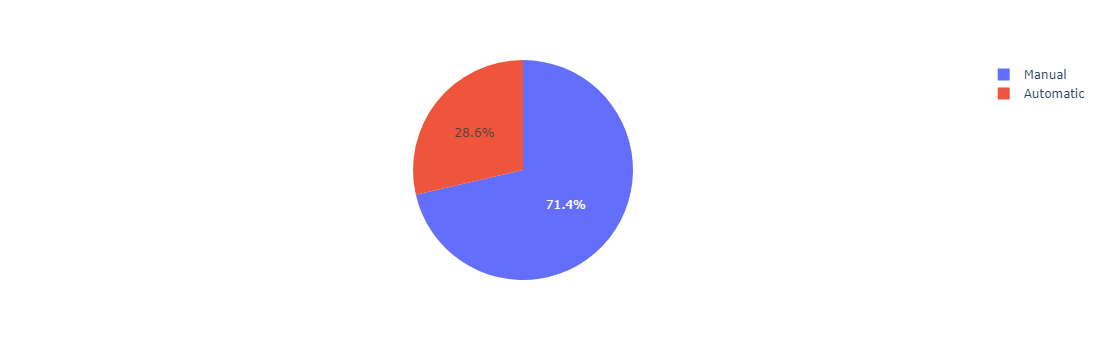

In [ ]:
fig = px.pie(data_frame = car,names =car['Transmission'])
fig.show()

#### 3.2.5) PIECHART FOR NUMBER OF THE OWNER DOES THE CAR GONE THROUGH

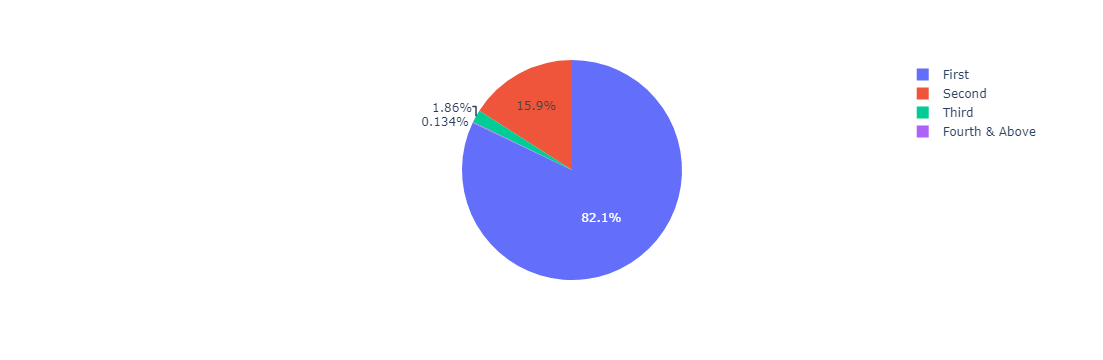

In [ ]:
fig = px.pie(data_frame = car,names =car['Owner_Type'])
fig.show()

#### 3.2.6) PIECHART FOR BRAND NAMES OF THE CAR

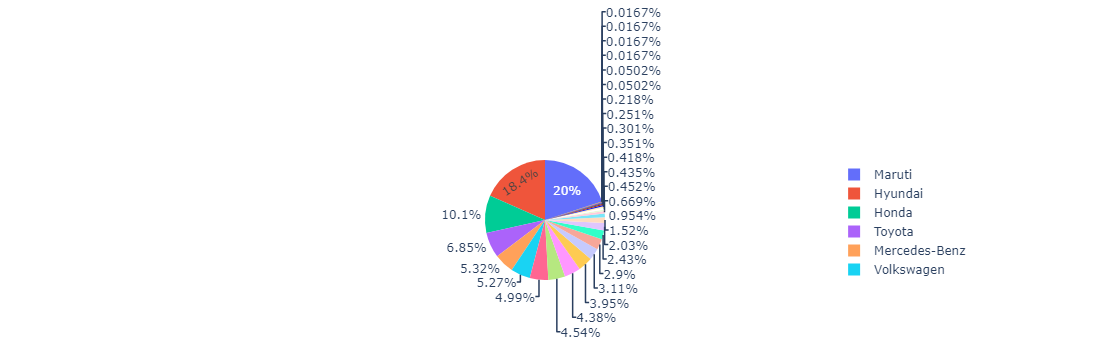

In [ ]:
fig = px.pie(data_frame = car,names =car['Brand'])
fig.show()

### 3.3) DATA VISUALISATION OF THE RELATION BETWEEN THE COLUMNS

#### 3.3.1) BAR GRAPH FOR SHOWING RELATIONSHIP BETWEEN LOCATION AND PRICE

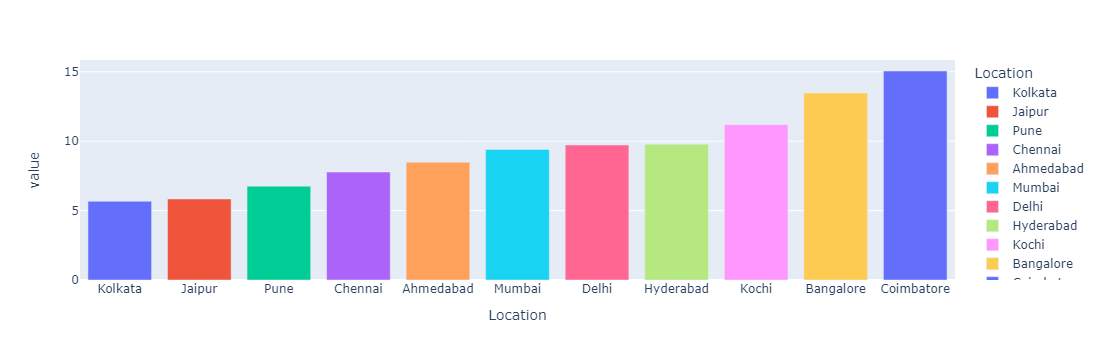

In [ ]:
lopr = car.groupby('Location')['Price'].mean().sort_values(ascending=True)
fig = px.bar(lopr,color = lopr.index )
fig.show()

#### 3.3.2) BAR GRAPH FOR SHOWING RELATIONSHIP BETWEEN TRANSMISSION AND PRICE

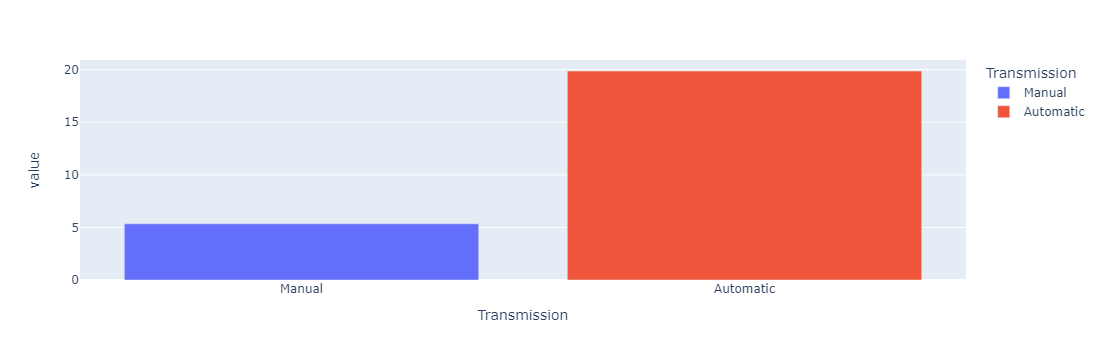

In [ ]:
tp = car.groupby('Transmission')['Price'].mean().sort_values(ascending=True)
fig = px.bar(tp, color= tp.index)
fig.show()

#### 3.3.3) BAR GRAPH FOR SHOWING RELATIONSHIP BETWEEN NUMBER OF OWNERSHIP ON THE CAR AND PRICE

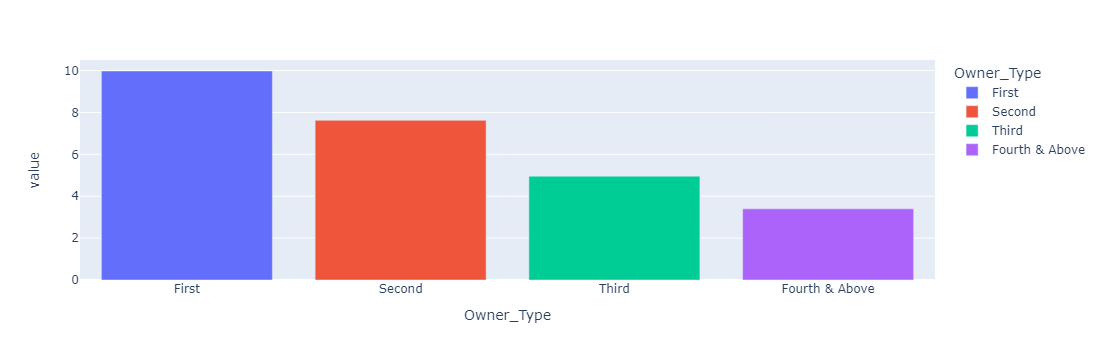

In [ ]:
own = car.groupby('Owner_Type')['Price'].mean().sort_values(ascending=False)
fig = px.bar(own, color= own.index)
fig.show()

#### 3.3.4) BAR GRAPH FOR SHOWING RELATIONSHIP BETWEEN BRAND OF THE CAR AND PRICE

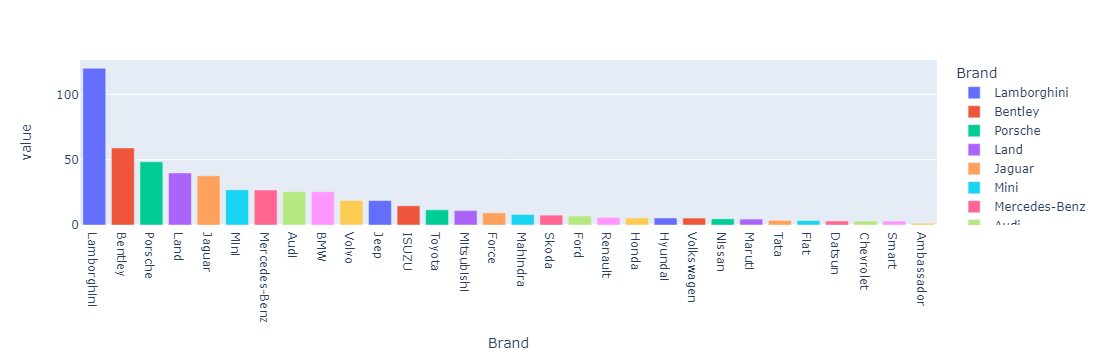

In [ ]:
bp = car.groupby('Brand')['Price'].mean().sort_values(ascending=False)
fig = px.bar(bp, color = bp.index )
fig.show()

#### 3.3.5) BAR GRAPH FOR SHOWING RELATIONSHIP BETWEEN NUMBER OF SEATS OF THE CAR AND PRICE

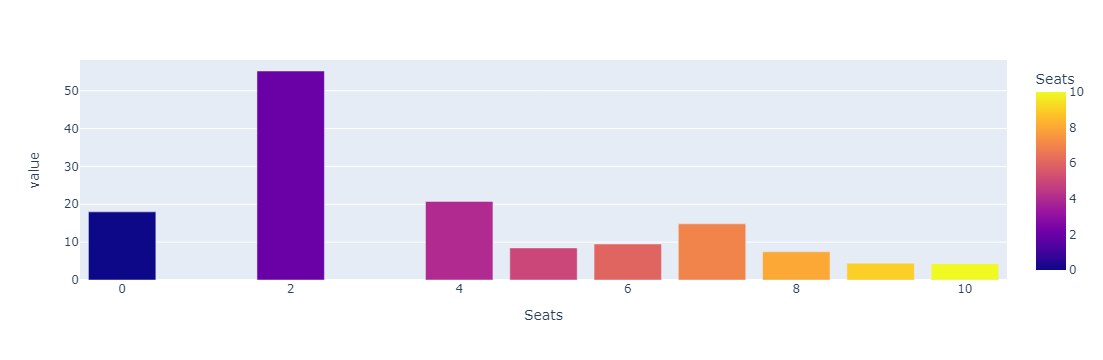

In [ ]:
sp = car.groupby('Seats')['Price'].mean()
fig = px.bar(sp,color = sp.index )
fig.show()

#### 3.3.6) SCATTER GRAPH FOR SHOWING RELATIONSHIP BETWEEN POWER OF THE CAR AND PRICE

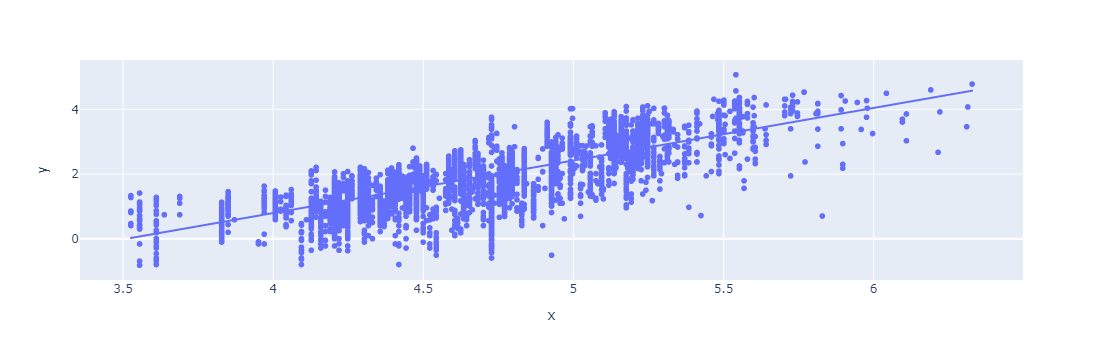

In [ ]:
fig = px.scatter(car , x = np.log(car['Power (bhp)']),y= np.log(car['Price']) ,trendline='ols')
fig.show()

#### 3.3.7) SCATTER GRAPH FOR SHOWING RELATIONSHIP BETWEEN ENGINE OF THE CAR AND PRICE

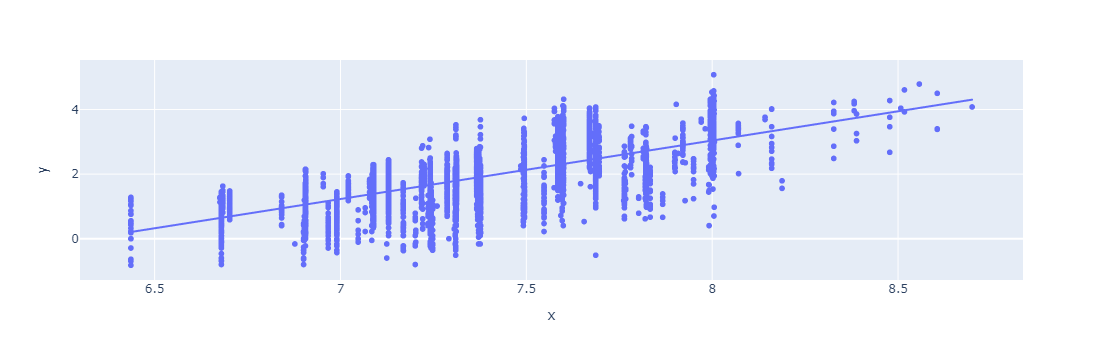

In [ ]:
fig = px.scatter(car, x = np.log(car['Engine (CC)']),y= np.log(car['Price']), trendline='ols')
fig.show()

### 3.4) HEATMAP FOR SHOWING RELATIONSHIP BETWEEN NUMERICAL COLUMNS

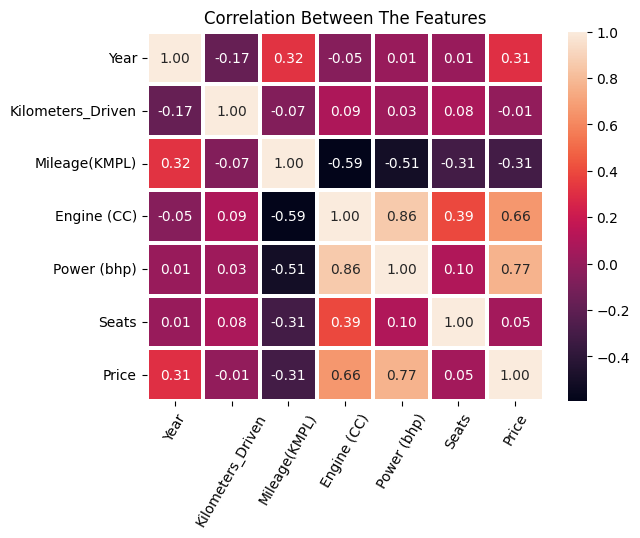

In [ ]:
plt.title('Correlation Between The Features')
a = sns.heatmap(car[['Year', 'Kilometers_Driven','Mileage(KMPL)', 'Engine (CC)',
                     'Power (bhp)', 'Seats', 'Price']].corr(), annot=True, fmt='.2f', linewidths=1.5)
a.set_xticklabels(a.get_xticklabels(), rotation=60)
a.set_yticklabels(a.get_yticklabels())
plt.show()

### 3.5} BOXPLOT CHART BEFORE REMOVING THE OUTLIERS FROM THE DATASET

<Axes: >

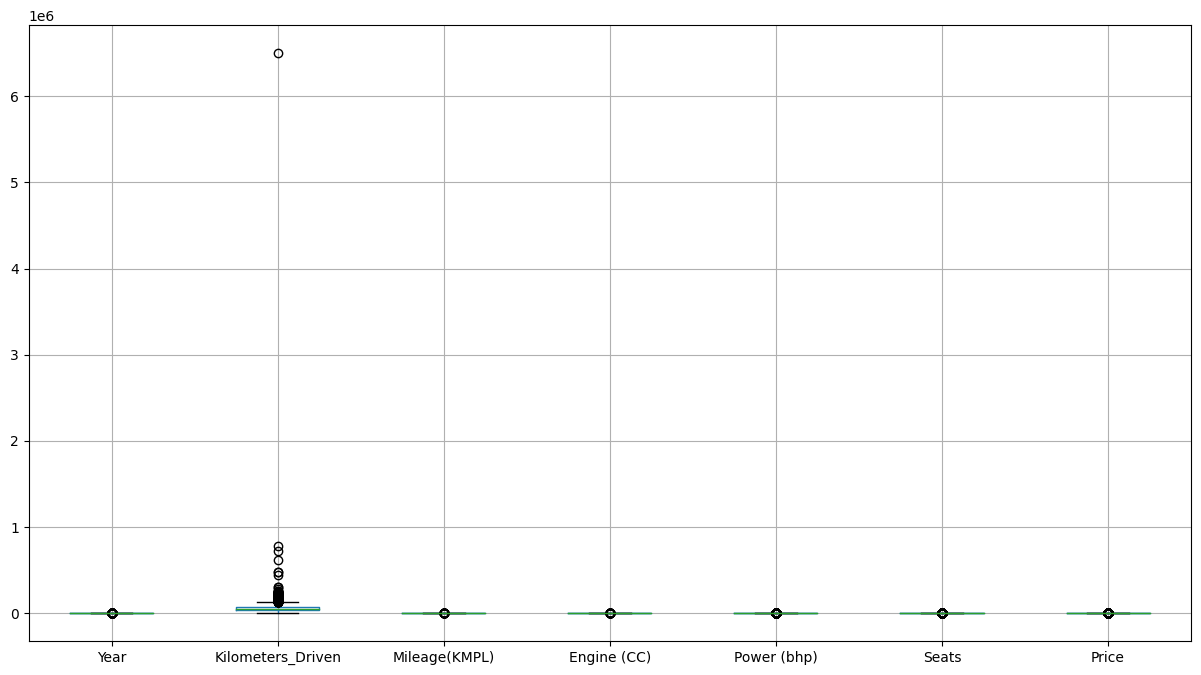

In [ ]:
plt.figure(figsize=(15,8))
car.boxplot()

## 4} CHECKING THE OUTLIERS

In [ ]:
car.describe()

Year  Kilometers_Driven  Mileage(KMPL)  Engine (CC)  \
count  5975.000000       5.975000e+03    5975.000000  5975.000000   
mean   2013.386778       5.867431e+04      18.109033  1621.606695   
std       3.247238       9.155851e+04       4.450774   601.036987   
min    1998.000000       1.710000e+02       0.000000   624.000000   
25%    2012.000000       3.390800e+04      15.170000  1198.000000   
50%    2014.000000       5.300000e+04      18.160000  1493.000000   
75%    2016.000000       7.300000e+04      21.100000  1984.000000   
max    2019.000000       6.500000e+06      28.400000  5998.000000   

       Power (bhp)        Seats        Price  
count  5975.000000  5975.000000  5975.000000  
mean    112.962510     5.278828     9.501647  
std      53.457419     0.808959    11.205736  
min      34.000000     0.000000     0.440000  
25%      77.000000     5.000000     3.500000  
50%      98.000000     5.000000     5.650000  
75%     138.000000     5.000000     9.950000  
max     560.000000    10.000000   160.000000

### 4.1) REMOVING THE OUTLIERS OF MILEAGE COLUMN

In [ ]:
car["Mileage(KMPL)"]=car["Mileage(KMPL)"].astype(int)
iqr=21.000000-16.000000
iqr

5.0

In [ ]:
lower_limit = 15.100000-1.5*iqr
upper_limit = 21.020000+1.5*iqr
print(upper_limit,lower_limit)

28.52 7.6


In [ ]:
car[(car["Mileage(KMPL)"]>upper_limit) | (car["Mileage(KMPL)"]<lower_limit)]

Name    Location  Year  Kilometers_Driven  \
14     Rover Freelander 2 TD4 SE        Pune  2012              85000   
67    C-Class Progressive C 220d  Coimbatore  2019              15369   
79                Santro Xing XL   Hyderabad  2005              87591   
152      S Class 2005 2013 S 500     Kolkata  2010              35277   
262               Santro Xing XL   Hyderabad  2006              99000   
...                          ...         ...   ...                ...   
5781              Gallardo Coupe       Delhi  2011               6500   
5875  C-Class Progressive C 220d   Ahmedabad  2019               4000   
5943              Jeep MM 540 DP     Chennai  2002              75000   
5972              Santro Xing GL      Mumbai  2008              65000   
6011           Superb 3.6 V6 FSI   Hyderabad  2009              53000   

     Fuel_Type Transmission Owner_Type  Mileage(KMPL)  Engine (CC)  \
14      Diesel    Automatic     Second              0         2179   
67      Diesel    Automatic      First              0         1950   
79      Petrol       Manual      First              0         1086   
152     Petrol    Automatic      First              7         5461   
262     Petrol       Manual      First              0         1086   
...        ...          ...        ...            ...          ...   
5781    Petrol    Automatic      Third              6         5204   
5875    Diesel    Automatic      First              0         1950   
5943    Diesel       Manual      First              0         2112   
5972    Petrol       Manual     Second              0         1086   
6011    Petrol    Automatic      First              0         3597   

      Power (bhp)  Seats   Price          Brand  
14            115      5   17.50           Land  
67            194      5   35.67  Mercedes-Benz  
79            113      5    1.30        Hyundai  
152           362      5   30.00  Mercedes-Benz  
262           113      5    1.75        Hyundai  
...           ...    ...     ...            ...  
5781          560      2  120.00    Lamborghini  
5875          194      5   35.00  Mercedes-Benz  
5943          113      6    1.70       Mahindra  
5972           62      5    1.39        Hyundai  
6011          262      5    4.75          Skoda  

[61 rows x 13 columns]

In [ ]:
car = car.drop(car[(car['Mileage(KMPL)'] <lower_limit) | (car['Mileage(KMPL)'] >upper_limit)].index)

<Axes: >

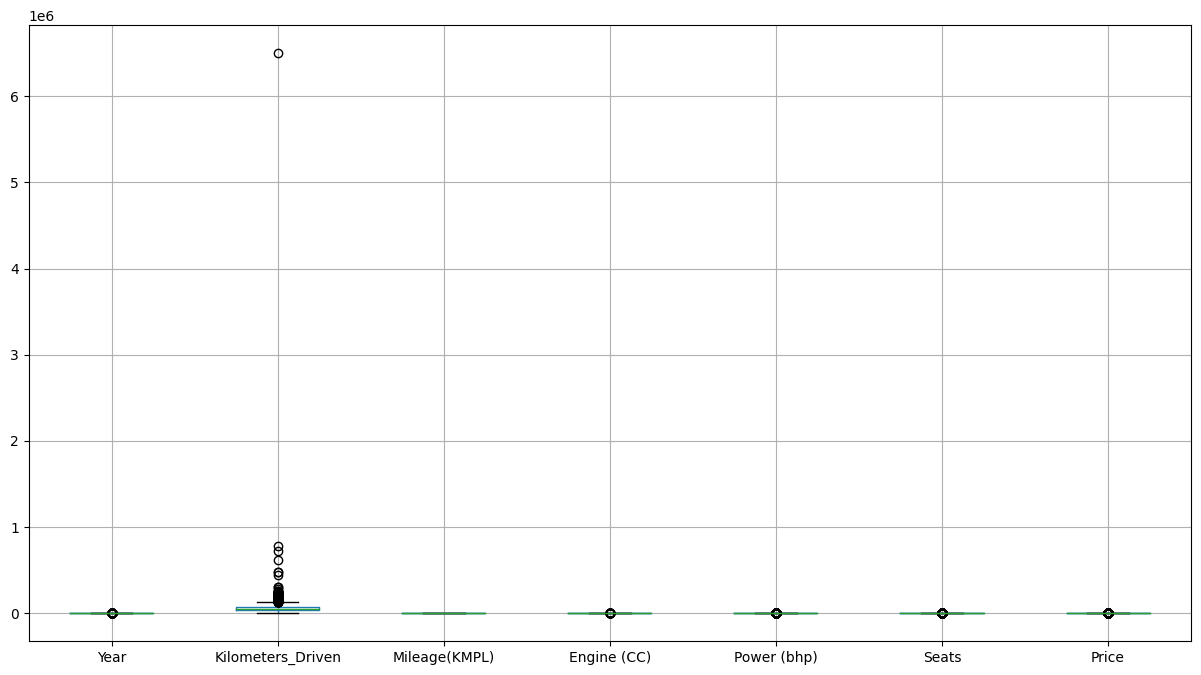

In [ ]:
plt.figure(figsize=(15,8))
car.boxplot()

### 4.2) REMOVING THE OUTLIERS OF ENGINE (CC) COLUMN

In [ ]:
car.describe()

Year  Kilometers_Driven  Mileage(KMPL)  Engine (CC)  \
count  5914.000000       5.914000e+03    5914.000000  5914.000000   
mean   2013.426446       5.855360e+04      17.857288  1617.533649   
std       3.208323       9.189551e+04       4.114782   591.143146   
min    1998.000000       1.710000e+02       8.000000   624.000000   
25%    2012.000000       3.386850e+04      15.000000  1198.000000   
50%    2014.000000       5.300000e+04      18.000000  1493.000000   
75%    2016.000000       7.287000e+04      21.000000  1969.000000   
max    2019.000000       6.500000e+06      28.000000  5998.000000   

       Power (bhp)        Seats        Price  
count  5914.000000  5914.000000  5914.000000  
mean    112.546331     5.281535     9.437653  
std      52.628845     0.806728    11.024368  
min      34.000000     0.000000     0.440000  
25%      76.000000     5.000000     3.500000  
50%      98.000000     5.000000     5.650000  
75%     138.000000     5.000000     9.900000  
max     552.000000    10.000000   160.000000

In [ ]:
car["Engine (CC)"]=car["Engine (CC)"].astype(int)
iqr=1968.000000-1198.000000
iqr

770.0

In [ ]:
lower_limit = 1198.000000-1.5*iqr
upper_limit = 1968.000000+1.5*iqr
print(upper_limit,lower_limit)

3123.0 43.0


In [ ]:
car[(car["Engine (CC)"]>upper_limit) | (car["Engine (CC)"]<lower_limit)]

Name    Location  Year  \
70                       Cayenne 2009-2014 Turbo      Mumbai  2008   
459                Q7 4.2 TDI Quattro Technology  Coimbatore  2016   
586                Q7 4.2 TDI Quattro Technology       Kochi  2014   
589                    S Class 2005 2013 S 350 L   Bangalore  2006   
693                            SLK-Class SLK 350  Coimbatore  2016   
703                   Endeavour 3.2 Trend AT 4X4  Coimbatore  2017   
798                            SLK-Class SLK 350   Bangalore  2015   
806                Endeavour 3.2 Titanium AT 4X4  Coimbatore  2017   
926                           Cayman 2009-2012 S   Hyderabad  2010   
1038             Rover Range Rover TDV8 (Diesel)   Bangalore  2011   
1076               Endeavour 3.2 Titanium AT 4X4   Hyderabad  2016   
1093               Q7 4.2 TDI Quattro Technology   Bangalore  2014   
1352  Rover Range Rover 3.6 TDV8 Vogue SE Diesel   Bangalore  2012   
1430                  Endeavour 3.2 Trend AT 4X4       Kochi  2018   
1596                          Q7 4.2 FSI quattro       Delhi  2008   
1724               Endeavour 3.2 Titanium AT 4X4       Delhi  2017   
1930                   S Class 2005 2013 S 350 L      Mumbai  2007   
2100                             Cayenne Turbo S      Mumbai  2010   
2305                Cayman 2009-2012 S tiptronic      Mumbai  2011   
2588                             Montero 3.2 GLS     Chennai  2007   
2669                  Endeavour 3.2 Trend AT 4X4  Coimbatore  2018   
2978                       Panamera 2010 2013 4S  Coimbatore  2010   
3028               Endeavour 3.2 Titanium AT 4X4  Coimbatore  2017   
3065               E-Class 2009-2013 E350 Petrol      Mumbai  2010   
3079               Endeavour 3.2 Titanium AT 4X4      Mumbai  2016   
3115                  Endeavour 3.2 Trend AT 4X4      Jaipur  2016   
3196               Endeavour 3.2 Titanium AT 4X4     Chennai  2019   
3242         Rover Range Rover Vogue SE 4.4 SDV8   Bangalore  2012   
3341                    7 Series 2007-2012 750Li       Kochi  2010   
3580                 CLS-Class 2006-2010 350 CDI   Hyderabad  2010   
3999                A4 3.2 FSI Tiptronic Quattro   Hyderabad  2012   
4039                    R-Class R350 4Matic Long      Mumbai  2011   
4136               E-Class 2009-2013 E350 Petrol      Mumbai  2009   
4227                  Endeavour 3.2 Trend AT 4X4     Chennai  2016   
4342                   S Class 2005 2013 S 350 L      Mumbai  2006   
4388               Q7 4.2 TDI Quattro Technology   Bangalore  2015   
4451                                  Mustang V8       Kochi  2018   
4559               Q7 4.2 TDI Quattro Technology       Delhi  2010   
4691                            SLK-Class 55 AMG   Bangalore  2014   
4722                             SL-Class SL 500     Kolkata  2010   
4869         Rover Range Rover 3.6 TDV8 Vogue SE  Coimbatore  2012   
4906               Endeavour 3.2 Titanium AT 4X4   Hyderabad  2018   
4938               Q7 4.2 TDI Quattro Technology  Coimbatore  2015   
5088                    XJ 5.0 L V8 Supercharged  Coimbatore  2011   
5278               Endeavour 3.2 Titanium AT 4X4       Delhi  2018   
5323               Endeavour 3.2 Titanium AT 4X4     Chennai  2017   
5341                            Cayenne S Diesel  Coimbatore  2016   
5414                    R-Class R350 4Matic Long       Kochi  2014   
5416         Rover Range Rover Vogue SE 4.4 SDV8  Coimbatore  2013   
5441               Endeavour 3.2 Titanium AT 4X4  Coimbatore  2017   
5521                     Continental Flying Spur   Hyderabad  2006   
5728               E-Class 2009-2013 E350 Petrol     Kolkata  2009   
5885                    R-Class R350 4Matic Long        Pune  2010   
5919                             F Type 5.0 V8 S   Hyderabad  2015   

      Kilometers_Driven Fuel_Type Transmission Owner_Type  Mileage(KMPL)  \
70                73000    Petrol    Automatic      First              8   
459               51002    Diesel    Auto

In [ ]:
car = car.drop(car[(car['Engine (CC)'] <lower_limit) | (car['Engine (CC)'] >upper_limit)].index)

<Axes: >

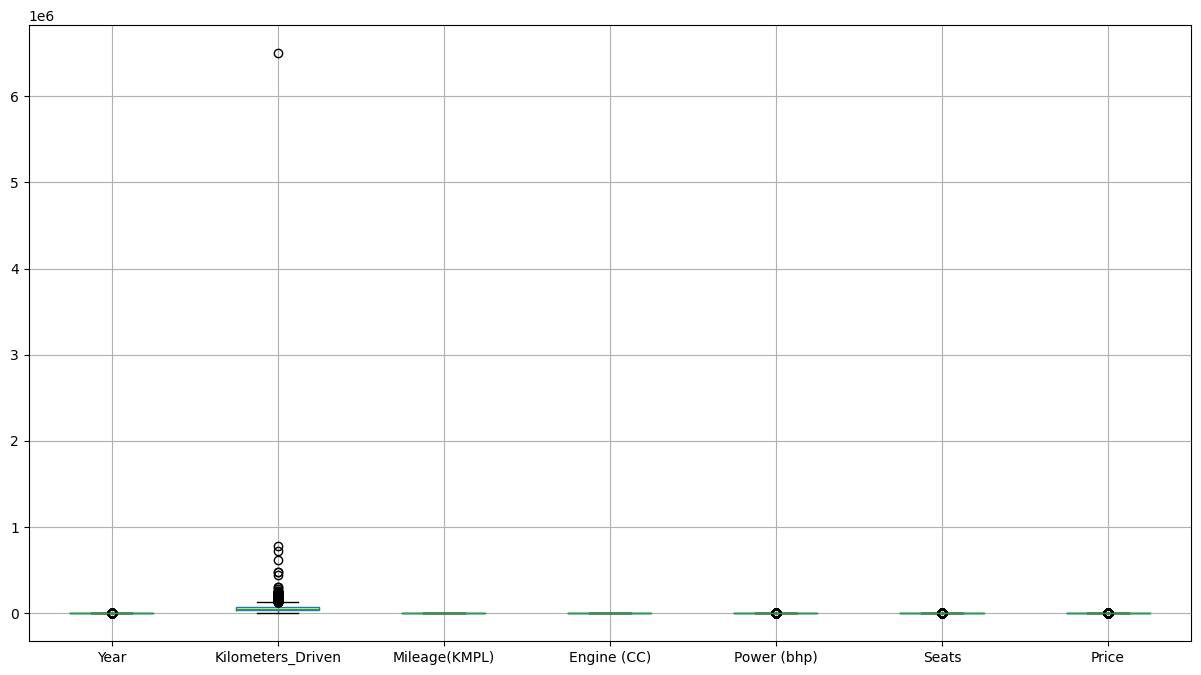

In [ ]:
plt.figure(figsize=(15,8))
car.boxplot()

### 4.3) REMOVING THE OUTLIERS OF POWER (BHP) COLUMN

In [ ]:
car.describe()

Year  Kilometers_Driven  Mileage(KMPL)  Engine (CC)  \
count  5860.000000       5.860000e+03    5860.000000  5860.000000   
mean   2013.430717       5.861130e+04      17.925597  1596.806826   
std       3.203058       9.226637e+04       4.067563   548.527198   
min    1998.000000       1.710000e+02       8.000000   624.000000   
25%    2012.000000       3.388950e+04      15.000000  1198.000000   
50%    2014.000000       5.300000e+04      18.000000  1491.000000   
75%    2016.000000       7.299700e+04      21.000000  1968.000000   
max    2019.000000       6.500000e+06      28.000000  2999.000000   

       Power (bhp)        Seats        Price  
count  5860.000000  5860.000000  5860.000000  
mean    110.865358     5.279522     9.186278  
std      48.814799     0.789302    10.575848  
min      34.000000     2.000000     0.440000  
25%      75.000000     5.000000     3.500000  
50%      97.000000     5.000000     5.600000  
75%     138.000000     5.000000     9.650000  
max     444.000000    10.000000   160.000000

In [ ]:
car["Power (bhp)"]=car["Power (bhp)"].astype(int)
iqr=138.000000-75.250000
iqr

62.75

In [ ]:
lower_limit = 75.250000-1.5*iqr
upper_limit = 138.000000+1.5*iqr
print(upper_limit,lower_limit)

232.125 -18.875


In [ ]:
car[(car["Power (bhp)"]>upper_limit) | (car["Power (bhp)"]<lower_limit)]

Name    Location  Year  Kilometers_Driven  \
38                  M-Class ML 350 CDI        Pune  2013              85000   
103         A4 3.0 TDI Quattro Premium     Kolkata  2010              30000   
107      XF 3.0 Litre S Premium Luxury   Hyderabad  2011              78000   
134                         SLC 43 AMG     Kolkata  2017              13372   
148                          RS5 Coupe      Mumbai  2013              23000   
...                                ...         ...   ...                ...   
5803  GL-Class 350 CDI Blue Efficiency     Chennai  2013             100000   
5868         3 Series 330d Convertible       Kochi  2014              51240   
5927     Q5 3.0 TDI Quattro Technology  Coimbatore  2018              29091   
5946   5 Series 2013-2017 530d M Sport   Bangalore  2016              16000   
6008                   Panamera Diesel   Hyderabad  2013              40000   

     Fuel_Type Transmission Owner_Type  Mileage(KMPL)  Engine (CC)  \
38      Diesel    Automatic      First             11         2987   
103     Diesel    Automatic      First             14         2967   
107     Diesel    Automatic     Second             14         2993   
134     Petrol    Automatic      First             19         2996   
148     Petrol    Automatic      First             11         2894   
...        ...          ...        ...            ...          ...   
5803    Diesel    Automatic     Second             11         2987   
5868    Diesel    Automatic      First              8         2993   
5927    Diesel    Automatic      First             13         2967   
5946    Diesel    Automatic      First             14         2993   
6008    Diesel    Automatic     Second             17         2967   

      Power (bhp)  Seats  Price          Brand  
38            254      5  28.00  Mercedes-Benz  
103           241      5   9.80           Audi  
107           270      5  24.00         Jaguar  
134           362      2  54.00  Mercedes-Benz  
148           444      4  37.00           Audi  
...           ...    ...    ...            ...  
5803          254      7  38.00  Mercedes-Benz  
5868          245      4  29.52            BMW  
5927          241      5  45.52           Audi  
5946          258      5  48.00            BMW  
6008          300      4  45.00        Porsche  

[195 rows x 13 columns]

In [ ]:
car = car.drop(car[(car['Power (bhp)'] <lower_limit) | (car['Power (bhp)'] >upper_limit)].index)

<Axes: >

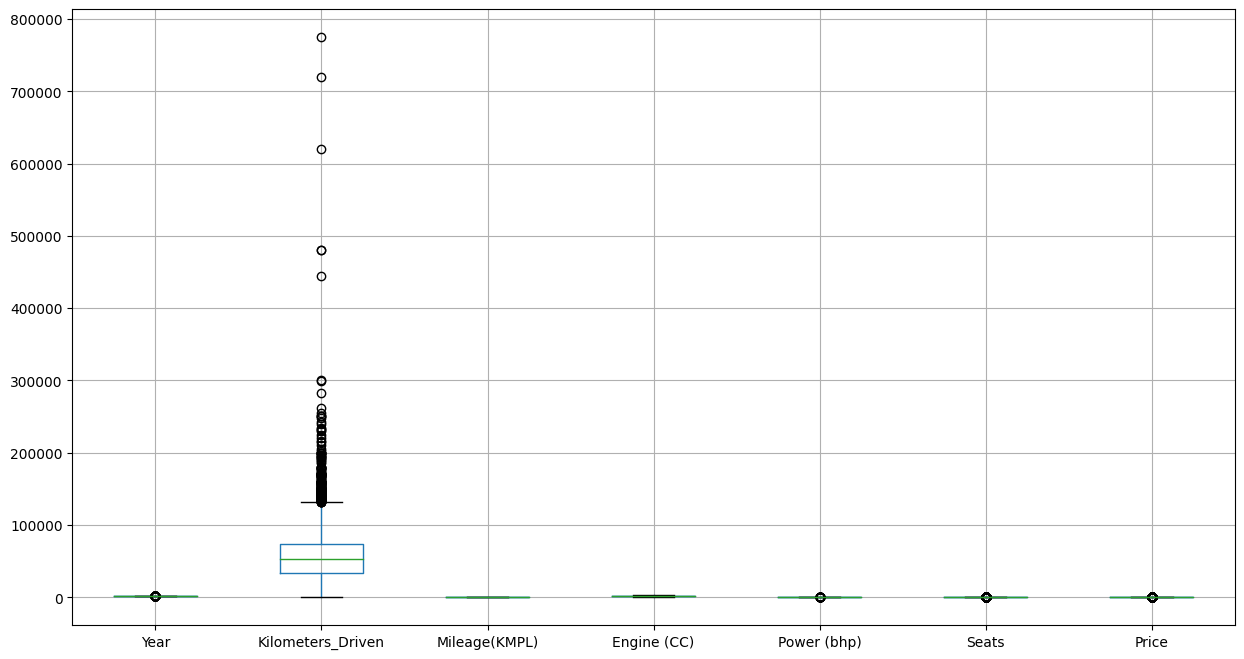

In [ ]:
plt.figure(figsize=(15,8))
car.boxplot()

### 4.4) REMOVING THE OUTLIERS OF KILOMETER DRIVEN COLUMN

In [ ]:
car.describe()

Year  Kilometers_Driven  Mileage(KMPL)  Engine (CC)  \
count  5665.000000        5665.000000    5665.000000  5665.000000   
mean   2013.416946       57781.690733      18.089320  1549.688967   
std       3.212440       38056.718445       4.015876   493.951209   
min    1998.000000         171.000000       8.000000   624.000000   
25%    2012.000000       34000.000000      15.000000  1197.000000   
50%    2014.000000       53285.000000      18.000000  1461.000000   
75%    2016.000000       73000.000000      21.000000  1968.000000   
max    2019.000000      775000.000000      28.000000  2999.000000   

       Power (bhp)        Seats        Price  
count  5665.000000  5665.000000  5665.000000  
mean    105.657546     5.279612     8.070055  
std      40.197793     0.776724     7.911378  
min      34.000000     2.000000     0.440000  
25%      74.000000     5.000000     3.480000  
50%      90.000000     5.000000     5.500000  
75%     126.000000     5.000000     8.910000  
max     231.000000    10.000000    61.250000

In [ ]:
car["Kilometers_Driven"]=car["Kilometers_Driven"].astype(int)
iqr=73000.000000-34000.000000
iqr

39000.0

In [ ]:
lower_limit = 34000.000000-1.5*iqr
upper_limit = 73000.000000+1.5*iqr
print(upper_limit,lower_limit)

131500.0 -24500.0


In [ ]:
car[(car["Kilometers_Driven"]>upper_limit) | (car["Kilometers_Driven"]<lower_limit)]

Name    Location  Year  Kilometers_Driven  \
29         Innova 2.5 V Diesel 7-seater      Mumbai  2007             262000   
64                        Indica V2 eLS     Chennai  2016             178000   
77                        Innova 2.0 G1     Chennai  2006             230000   
154       Superb Elegance 2.0 TDI CR AT        Pune  2012             136997   
164        Ecosport 1.5 DV5 MT Ambiente       Kochi  2014             147898   
...                                 ...         ...   ...                ...   
5852      Innova 2.5 G4 Diesel 8-seater     Chennai  2008             192000   
5871  Endeavour 4x2 XLT Limited Edition        Pune  2009             180000   
5914           Octavia Elegance 1.9 TDI   Hyderabad  2003             132000   
5953                    Figo Diesel EXI      Jaipur  2012             140000   
5957                       City 1.5 EXI  Coimbatore  2004             186679   

     Fuel_Type Transmission      Owner_Type  Mileage(KMPL)  Engine (CC)  \
29      Diesel       Manual  Fourth & Above             12         2494   
64      Diesel       Manual           First             25         1396   
77      Petrol       Manual           Third             12         1998   
154     Diesel    Automatic           First             17         1968   
164     Diesel       Manual           First             22         1498   
...        ...          ...             ...            ...          ...   
5852    Diesel       Manual           First             12         2494   
5871    Diesel       Manual           First             10         2499   
5914    Diesel       Manual           First             18         1896   
5953    Diesel       Manual           First             20         1399   
5957    Petrol       Manual          Second             13         1493   

      Power (bhp)  Seats  Price   Brand  
29            102      7   4.00  Toyota  
64             69      5   2.50    Tata  
77            132      8   4.50  Toyota  
154           138      5   8.50   Skoda  
164            89      5   4.42    Ford  
...           ...    ...    ...     ...  
5852          102      8   6.85  Toyota  
5871          143      7   7.50    Ford  
5914           66      5   2.25   Skoda  
5953           68      5   2.51    Ford  
5957          100      5   1.76   Honda  

[192 rows x 13 columns]

In [ ]:
car = car.drop(car[(car['Kilometers_Driven'] <lower_limit) | (car['Kilometers_Driven'] >upper_limit)].index)

<Axes: >

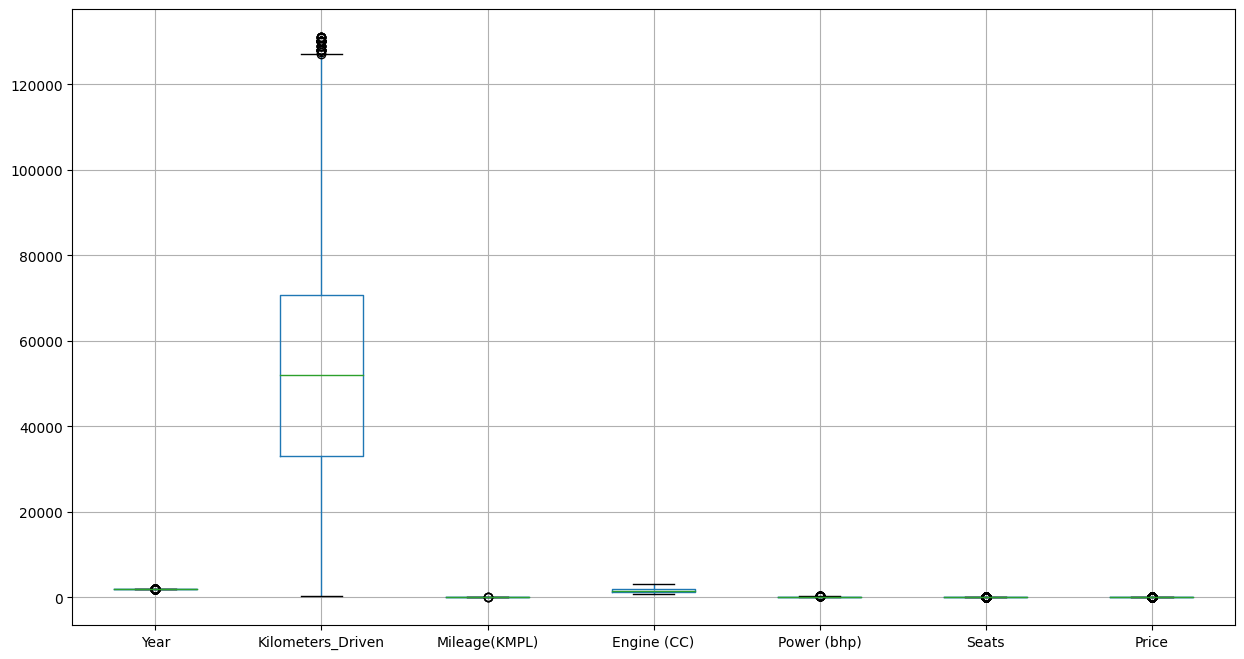

In [ ]:
plt.figure(figsize=(15,8))
car.boxplot()

#### OUTPUT :- MAJOR OUTLIERS OF EVERY COLUMN HAVE BEEN REMOVED

## 5} ENCODING CHARACTER COLUMNS WITH THE HELP OF LABEL ENCODER

In [ ]:
from sklearn.preprocessing import LabelEncoder
fuel = LabelEncoder()
car['fuel_enc']=fuel.fit_transform(car['Fuel_Type'])

In [ ]:
from sklearn.preprocessing import LabelEncoder
trans = LabelEncoder()
car['trans_enc']=trans.fit_transform(car['Transmission'])

In [ ]:
car

Name    Location  Year  Kilometers_Driven  \
0                Wagon R LXI CNG      Mumbai  2010              72000   
1       Creta 1.6 CRDi SX Option        Pune  2015              41000   
2                         Jazz V     Chennai  2011              46000   
3                     Ertiga VDI     Chennai  2012              87000   
4     A4 New 2.0 TDI Multitronic  Coimbatore  2013              40670   
...                          ...         ...   ...                ...   
6014                   Swift VDI       Delhi  2014              27365   
6015            Xcent 1.1 CRDi S      Jaipur  2015             100000   
6016                Xylo D4 BSIV      Jaipur  2012              55000   
6017                 Wagon R VXI     Kolkata  2013              46000   
6018                 Beat Diesel   Hyderabad  2011              47000   

     Fuel_Type Transmission Owner_Type  Mileage(KMPL)  Engine (CC)  \
0          CNG       Manual      First             19          998   
1       Diesel       Manual      First             19         1582   
2       Petrol       Manual      First             18         1199   
3       Diesel       Manual      First             20         1248   
4       Diesel    Automatic     Second             15         1968   
...        ...          ...        ...            ...          ...   
6014    Diesel       Manual      First             28         1248   
6015    Diesel       Manual      First             24         1120   
6016    Diesel       Manual     Second             14         2498   
6017    Petrol       Manual      First             18          998   
6018    Diesel       Manual      First             25          936   

      Power (bhp)  Seats  Price      Brand  fuel_enc  trans_enc  
0              58      5   1.75     Maruti         0          1  
1             126      5  12.50    Hyundai         1          1  
2              88      5   4.50      Honda         3          1  
3              88      7   6.00     Maruti         1          1  
4             140      5  17.74       Audi         1          0  
...           ...    ...    ...        ...       ...        ...  
6014           74      5   4.75     Maruti         1          1  
6015           71      5   4.00    Hyundai         1          1  
6016          112      8   2.90   Mahindra         1          1  
6017           67      5   2.65     Maruti         3          1  
6018           57      5   2.50  Chevrolet         1          1  

[5473 rows x 15 columns]

## 6} DATA MODELING

### 6.1) IMPORTING SKLEARN LIBRARIES

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor

### 6.2) TRAIN TEST SPLIT

In [ ]:
X=car.drop(["Price","Name","Brand","Location","Fuel_Type","Transmission","Owner_Type"],axis=1)
Y=car['Price']
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size= 0.2,random_state=0)

### 6.3) DEFINING THE REGRESSION MODELS

In [ ]:
lr = LinearRegression()
rf = RandomForestRegressor(n_estimators=1000)
gb = GradientBoostingRegressor(n_estimators = 1000)
dt = DecisionTreeRegressor()
regression_models = [lr,rf,gb,dt]
score_train = list()
score_test = list()

for model in regression_models :
    model.fit(X_train,Y_train)
    y_pred = model.predict(X_test)

    score_train.append(model.score(X_train,Y_train))
    score_test.append(model.score(X_test,Y_test))

### 6.4} LINEAR REGRESSION

#### 6.4.1) CALCULATE y_pred FOR LINEAR REGRESSION

In [ ]:
lr = LinearRegression()
lr.fit(X_train, Y_train)
y_pred= lr.predict(X_test)

#### 6.4.2) PRINTING ACCURACY FOR LINEAR REGRESSION

In [ ]:
print("Accuracy on Traing set in %  : ",(lr.score(X_train,Y_train)*100))
print("Accuracy on Testing set in % : ",(lr.score(X_test,Y_test)*100))

Accuracy on Traing set in %  :  69.23631640641162
Accuracy on Testing set in % :  70.5484166610512


### 6.5} RANDOM FOREST REGRESSOR

#### 6.5.1) CALCULATING y_pred FOR RANDOM FOREST REGRESSOR

In [ ]:
rf = RandomForestRegressor()
rf = rf.fit(X_train,Y_train)
y_pred= rf.predict(X_test)

#### 6.5.2) PRINTING ACCURACY FOR THE RANDOM FOREST REGRESSOR

In [ ]:
print("Accuracy on Traing set in %  : ",(rf.score(X_train,Y_train)*100))
print("Accuracy on Testing set in % : ",(rf.score(X_test,Y_test)*100))

Accuracy on Traing set in %  :  98.68704571971197
Accuracy on Testing set in % :  91.11121125376457


### 6.6) GRADIENT BOOSTING REGRESSOR

#### 6.6.1) CALCULATING y_pred FOR GRADIENT BOOSTING REGRESSOR

In [ ]:
gb = GradientBoostingRegressor()
gb = gb.fit(X_train,Y_train)
y_pred=gb.predict(X_test)

#### 6.6.2) PRINTING ACCURACY FOR GRADIENT BOOSTING REGRESSOR

In [ ]:
print("Accuracy on Traing set in %  : ",(gb.score(X_train,Y_train)*100))
print("Accuracy on Testing set in % : ",(gb.score(X_test,Y_test)*100))

Accuracy on Traing set in %  :  91.84731474204526
Accuracy on Testing set in % :  89.77947471536719


### 6.7) DECISION TREE REGRESSOR

#### 6.7.1) CALCULATING y_pred FOR DECISION TREE REGRESSOR

In [ ]:
dt = DecisionTreeRegressor()
dt = dt.fit(X_train,Y_train)
y_pred=dt.predict(X_test)

#### 6.7.2) PRINTING ACCURACY FOR DECISION TREE REGRESSOR

In [ ]:
print("Accuracy on Traing set in %  : ",(dt.score(X_train,Y_train)*100))
print("Accuracy on Testing set in % : ",(dt.score(X_test,Y_test)*100))

Accuracy on Traing set in %  :  99.94264288725508
Accuracy on Testing set in % :  84.70742286463513


#### PRINTING ALL THE ACCURACY OF ALL THE MODELS IN TABULAR FORM

In [ ]:
model_names = ['Linear Regression','Random Forest Regressor','Gradient Boosting Regressor','Decision Tree Regressor']
scores = pd.DataFrame([model_names,score_train,score_test])
scores = scores.transpose()
scores.columns = [ '--Model --','--Training Set Accuracy--','--Testing set Accuracy--']
scores

--Model -- --Training Set Accuracy--  \
0            Linear Regression                  0.692363   
1      Random Forest Regressor                  0.987533   
2  Gradient Boosting Regressor                  0.972136   
3      Decision Tree Regressor                  0.999426   

  --Testing set Accuracy--  
0                 0.705484  
1                  0.91288  
2                 0.920948  
3                 0.845159

### 6.8) CALCULATING AND PRINTING ERROR SCORES

In [ ]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error

print("\t\tError Table\n")
print('Mean Absolute Error        : ', metrics.mean_absolute_error(Y_test, y_pred))
print('Mean Squared  Error        : ', metrics.mean_squared_error(Y_test, y_pred))
print('Root Mean Squared  Error   : ', np.sqrt(metrics.mean_squared_error(Y_test, y_pred)))
print('R Squared Error            : ', metrics.r2_score(Y_test, y_pred))

		Error Table

Mean Absolute Error        :  1.6734992389649923
Mean Squared  Error        :  10.190667709284627
Root Mean Squared  Error   :  3.1922825234124605
R Squared Error            :  0.8470742286463513


In [47]:
val = input("Enter your value: ")
print(cat)

Enter your value:  2


NameError: name 'cat' is not defined